In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import glob
import re


In [3]:
# beige_color = (255/255,253/255,250/255)
beige_color = '#FFFDFA'

# sns.set_theme(style="ticks", rc={'figure.facecolor': beige_color, 'axes.facecolor' : beige_color})
sns.set_theme(style="ticks")
# sns.set_context("talk")
# sns.set_context("poster")


In [21]:
# path = "results/linear_multi"
# path = "results/lin"
path = "results/lin/bym"
all_file = glob.glob(path + "/*.csv")
print(all_file)

['results/lin/bym\\linear_dgp_iid_and_bym_1.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_10.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_11.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_12.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_13.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_14.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_15.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_16.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_17.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_18.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_19.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_2.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_20.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_21.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_22.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_23.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_24.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_25.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_26.csv', 'results/lin/bym\\linear_dgp_iid_and_bym_28.csv', '

In [22]:
lin_dfs = [pd.read_csv(f) for f in all_file]
combined_df = pd.concat(lin_dfs)
# combined_df['method'] = combined_df['method'].replace({
#     'BYM_1S_rep': 'BYMrep_1S',
#     'BYM_3S_rep': 'BYMrep_3S',
#     'Linear_3S_rep' : 'Linearrep_3S',
#     'Linear_1S_rep' : 'Linearrep_1S',
# })

combined_df[['model', 'type']] = combined_df['method'].str.split('_', expand=True)
# combined_df[combined_df["method"] in ["BYM_1S_rep",]]
# print(combined_df.head(5))
print(combined_df['method'].unique())
print(combined_df['model'].unique())
print(combined_df['type'].unique())

['Linear_oracle' 'BYM_oracle' 'Linear_observed' 'BYM_observed' 'Linear_3S'
 'BYM_3S' 'Linear_1S' 'BYM_1S' 'method']
['Linear' 'BYM' 'method']
['oracle' 'observed' '3S' '1S' None]


In [23]:
print(combined_df.columns, combined_df.shape)

Index(['idx', 'mean', 'median', 'true', 'bias', 'std', 'RMSE', 'RMSE_all',
       'MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
       'q025', 'q975', 'covering', 'mean_ind_cover', 'method', 'estimand',
       'TRUE', 'model', 'type'],
      dtype='object') (5428, 23)


In [24]:
combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
             'q025','q975','covering','mean_ind_cover']] = combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'MAPE', 'MAPE_all', 'rel_RMSE', 'rel_RMSE_all',
                                                                        'q025','q975','covering', 'mean_ind_cover']].apply(pd.to_numeric, errors='coerce')

# combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 'q025','q975','covering','mean_ind_cover']] = combined_df[['bias','median','true','mean','std','RMSE','RMSE_all','MAE', 'MAE_all', 
#                                                                         'q025','q975','covering', 'mean_ind_cover']].apply(pd.to_numeric, errors='coerce')

In [25]:
# combined_df = combined_df.apply(pd.to_numeric, errors='coerce')


combined_df['type'] = combined_df['type'].replace('observed',"Obs.")
combined_df['type'] = combined_df['type'].replace('oracle',"Oracle")
combined_df['type'] = combined_df['type'].replace('plugin',"Plugin")
combined_df['abs_bias'] = np.abs(combined_df['bias'])
combined_df['ci_length'] = combined_df['q975'] - combined_df['q025']
# combined_df['MAPE_manual'] = np.abs((combined_df['mean']-combined_df['true'])/combined_df['true'])
# combined_df['rel_RMSE'] = np.square((combined_df['mean']-combined_df['true'])/combined_df['true'])

# combined_df.to_csv("results/linear_dgp_N300.csv")


In [26]:
# print dtype of each column 
print(combined_df.dtypes)

idx                object
mean              float64
median            float64
true              float64
bias              float64
std               float64
RMSE              float64
RMSE_all          float64
MAE               float64
MAE_all           float64
MAPE              float64
MAPE_all          float64
rel_RMSE          float64
rel_RMSE_all      float64
q025              float64
q975              float64
covering          float64
mean_ind_cover    float64
method             object
estimand           object
TRUE              float64
model              object
type               object
abs_bias          float64
ci_length         float64
dtype: object


37
0.37500003


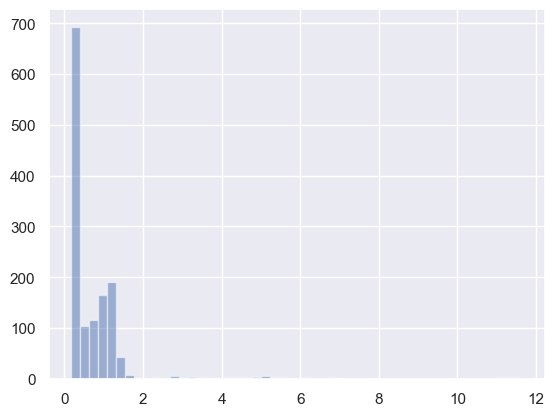

In [27]:
plt.hist(combined_df[combined_df['type'] == '3S']['MAE'], bins=50, alpha=0.5, label='Observed')

err_mask = (combined_df['type'].values == '3S') & (combined_df['MAE'].values > 2)
print(err_mask.sum())

print(combined_df[combined_df['type'] == '3S']['MAE'].median())


In [28]:
err_mask = (combined_df['type'].values == '3S') & (combined_df['MAE'].values > 2)
err_idx = combined_df[err_mask]['idx'].unique()
combined_df = combined_df[~combined_df['idx'].isin(err_idx)]
print(combined_df.shape)

(5076, 25)


In [29]:
combined_df

,idx,mean,median,true,bias,std,RMSE,RMSE_all,MAE,MAE_all,...,q975,covering,mean_ind_cover,method,estimand,TRUE,model,type,abs_bias,ci_length
0,1.0,0.548,0.547,0.646,-0.098,0.065,0.131,0.179,0.098,0.109,...,0.681,1.0,1.000,Linear_oracle,dynamic,NaN,Linear,Oracle,0.098,0.256
1,1.0,0.809,0.779,0.646,0.163,0.198,0.475,0.636,0.162,0.224,...,1.268,1.0,1.000,BYM_oracle,dynamic,NaN,BYM,Oracle,0.163,0.753
2,1.0,2.237,2.231,2.646,-0.409,0.269,0.442,0.529,0.409,0.429,...,2.787,1.0,1.000,Linear_oracle,stoch,NaN,Linear,Oracle,0.409,1.062
3,1.0,3.284,3.162,2.646,0.638,0.803,0.639,1.048,0.638,0.772,...,5.142,1.0,1.000,BYM_oracle,stoch,NaN,BYM,Oracle,0.638,3.051
4,1.0,0.349,0.349,0.646,-0.297,0.079,0.403,0.423,0.314,0.323,...,0.503,0.0,0.376,Linear_observed,dynamic,NaN,Linear,Obs.,0.297,0.307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11,9.0,2.084,1.937,2.646,-0.562,1.277,0.728,1.538,0.595,1.162,...,4.828,1.0,1.000,BYM_3S,stoch,NaN,BYM,3S,0.562,6.191
12,9.0,0.641,0.639,0.646,-0.005,0.115,0.501,0.524,0.340,0.352,...,0.873,1.0,0.422,Linear_1S,dynamic,NaN,Linear,1S,0.005,0.449
13,9.0,0.853,0.804,0.646,0.207,0.262,0.370,0.556,0.303,0.394,...,1.492,1.0,0.572,BYM_1S,dynamic,NaN,BYM,1S,0.207,1.020
14,9.0,2.452,2.442,2.646,-0.194,0.439,0.451,0.654,0.357,0.508,...,3.335,1.0,0.914,Linear_1S,stoch,NaN,Linear,1S,0.194,1.713


In [139]:
# Save as csv
combined_df.to_csv("results/linear_results_combined_N500.csv")

In [ ]:
# TODO: clean all the above in final version

In [24]:
combined_df = pd.read_csv("results/linear_results_combined_N500.csv")
combined_df['rel_RMSE'] = np.sqrt(combined_df['rel_RMSE'])
combined_df['rel_RMSE_all'] = np.sqrt(combined_df['rel_RMSE_all'])

In [30]:
def coverage_perc(x):
    return np.mean(x)*100

# df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
df_summary = combined_df.groupby(["estimand", "model", "type"]).agg(
                                        {
                                            # 'mean' : ['mean'],
                                         # 'median' : ['mean'],
                                         'bias' : ['mean', 'std'],
                                         # 'std' : ['mean'],
                                         # 'true' : ['mean'],
                                         'RMSE' : ['mean','std'],
                                         # 'RMSE_all' : ['mean','std'],
                                         # 'MAE' : ['mean','std'],
                                         # 'MAE_all' : ['mean'],
                                         'MAPE' : ['mean','std'],
                                        # 'MAPE_all' : ['mean'],
                                         'rel_RMSE' : ['mean','std'],
                                        # 'rel_RMSE_all' : ['mean'],
                                        #  'q025' : ['mean'],
                                        #  'q975' : ['mean'],
                                         'ci_length' : ['mean','std'],
                                         'covering' : [coverage_perc],
                                         'mean_ind_cover' : ['mean'],}
                                         # 'norm_coverage' : [coverage_perc]}

                                            ).reset_index()
                                         # 'true_included99' : [coverage_perc]})
                                         # 'true_included95' : ['mean'],
                                         # 'true_included99' : ['mean']})

# df_summary.columns = ['estimand','model','type','bias','bias_std', 'rel_RMSE','rel_RMSE_std', 'ci_length','ci_length_std','covering','mean_ind_cover']
df_summary

estimand   model    type      bias                RMSE                MAPE  \
                                 mean       std      mean       std      mean   
0   dynamic     BYM      1S  0.154315  0.139214  0.354476  0.107804  0.419489   
1   dynamic     BYM      3S -0.122562  0.107441  0.325435  0.084052  0.370662   
2   dynamic     BYM    Obs. -0.302278  0.320820  0.666666  0.397516  0.687770   
3   dynamic     BYM  Oracle  0.056767  0.108053  0.212757  0.137170  0.180905   
4   dynamic  Linear      1S -0.050524  0.112152  0.370776  0.063286  0.407470   
5   dynamic  Linear      3S -0.240864  0.051827  0.433218  0.072674  0.455562   
6   dynamic  Linear    Obs. -0.331480  0.080734  0.500593  0.084097  0.560722   
7   dynamic  Linear  Oracle -0.132927  0.072044  0.298476  0.094019  0.230069   
8     stoch     BYM      1S  0.402382  0.520253  0.712016  0.330649  0.231763   
9     stoch     BYM      3S -0.636177  0.409759  0.855338  0.312519  0.272785   
10    stoch     BYM    Obs. -1.379069  1.127468  1.686057  0.968750  0.568495   
11    stoch     BYM  Oracle  0.228959  0.444764  0.429076  0.313243  0.151028   
12    stoch  Linear      1S -0.384647  0.417861  0.666965  0.224127  0.212300   
13    stoch  Linear      3S -1.095830  0.196167  1.214978  0.188426  0.414877   
14    stoch  Linear    Obs. -1.492101  0.268132  1.664189  0.244019  0.564981   
15    stoch  Linear  Oracle -0.537334  0.301143  0.581666  0.265770  0.211905   

              rel_RMSE           ci_length                covering  \
         std      mean       std      mean       std coverage_perc   
0   0.116309  0.328445  0.212155  0.893060  0.168055     94.637224   
1   0.070753  0.270404  0.167392  0.982987  0.305282     98.422713   
2   0.353368  1.440886  1.699895  1.068931  0.367123     82.018927   
3   0.105034  0.153262  0.192539  0.690508  0.147080     99.053628   
4   0.055260  0.338580  0.113842  0.389801  0.070339     84.858044   
5   0.056585  0.461801  0.148511  0.316369  0.044307     13.564669   
6   0.091156  0.616773  0.205686  0.310770  0.036937      2.523659   
7   0.084756  0.234328  0.130621  0.262372  0.035578     48.580442   
8   0.121753  0.087927  0.092051  3.399114  0.630933     97.476341   
9   0.113778  0.118391  0.084726  3.736401  1.146893     95.899054   
10  0.378335  0.539584  0.649888  3.634464  1.164878     74.132492   
11  0.114263  0.040249  0.056788  2.820499  0.596724     99.053628   
12  0.082137  0.070703  0.049615  1.463763  0.255935     73.501577   
13  0.072566  0.215861  0.063646  1.166558  0.159940      5.047319   
14  0.099321  0.403994  0.118536  1.033562  0.122999      0.315457   
15  0.097108  0.058366  0.047061  1.094013  0.148306     51.104101   

   mean_ind_cover  
             mean  
0        0.631262  
1        0.912385  
2        0.633647  
3        0.982000  
4        0.462820  
5        0.721943  
6        0.312656  
7        0.758398  
8        0.941495  
9        0.954738  
10       0.708063  
11       0.987729  
12       0.684738  
13       0.297199  
14       0.089457  
15       0.478726

In [23]:
def generate_latex_table(df):
    # Round all numeric columns to 3 decimal places
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].round(3)

    # Start the LaTeX table
    latex_table = "\\begin{table}[htbp]\n\\centering\n\\caption{Simulation Results}\n\\label{tab:simulation_results}\n"
    latex_table += "\\begin{tabular}{lllcccc}\n\\toprule\n"
    # latex_table += "Estimand & Model & Type & Bias (std) & MAPE (std) & CI Length (std) & Coverage \\\\\n\\midrule\n"
    # latex_table += "Estimand & Model & Type & Bias (std) & RMSE (std) & CI Length (std) & Coverage \\\\\n\\midrule\n"
    latex_table += "Estimand & Model & Type & Bias (std) & Rel. RMSE (std) & CI Length (std) & Coverage \\\\\n\\midrule\n"

    # Group by estimand and model
    for e, (estimand, estimand_group) in enumerate(df.groupby('estimand')):
        for m, (model, model_group) in enumerate(estimand_group.groupby('model')):
            if m > 0:
                latex_table += "\\cmidrule{2-7}\n"
                # latex_table += "\\cmidrule{2-6}\n"

            for i, (_, row) in enumerate(model_group.iterrows()):
                if i == 0:
                    if m == 0:
                        latex_table += f"\\multirow{{8}}{{*}}{{{estimand}}} & "
                    else:
                        latex_table += " & "
                    latex_table += f"\\multirow{{4}}{{*}}{{{model}}} "
                else:
                    latex_table += " & "
                
                bias_str = f"{row['bias']:.3f} ({row['bias_std']:.3f})"
                # mape_str = f"{row['MAPE']:.3f} ({row['MAPE_std']:.3f})"
                mape_str = f"{row['rel_RMSE']:.3f} ({row['rel_RMSE_std']:.3f})"
                ci_length_str = f"{row['ci_length']:.3f} ({row['ci_length_std']:.3f})"
                coverage_str = f"{row['covering']:.1f}\\%"
                
                latex_table += f"& {row['type']} & {bias_str} & {mape_str} & {ci_length_str} & {coverage_str} \\\\\n"
                # latex_table += f"& {row['type']} & {mape_str} & {ci_length_str} & {coverage_str} \\\\\n"

        if e == 0:  # Add midrule after first estimand
            latex_table += "\\midrule\n"

    # End the LaTeX table
    latex_table += "\\bottomrule\n\\end{tabular}\n\\end{table}"

    return latex_table


# Assuming your DataFrame is called 'results_df'
latex_table = generate_latex_table(df_summary)
print(latex_table)

\begin{table}[htbp]
\centering
\caption{Simulation Results}
\label{tab:simulation_results}
\begin{tabular}{lllcccc}
\toprule
Estimand & Model & Type & Bias (std) & Rel. RMSE (std) & CI Length (std) & Coverage \\
\midrule
\multirow{8}{*}{dynamic} & \multirow{4}{*}{BYM} & 1S & 0.158 (0.140) & 0.329 (0.213) & 0.892 (0.170) & 94.4\% \\
 & & 3S & -0.119 (0.109) & 0.273 (0.173) & 0.986 (0.308) & 98.8\% \\
 & & Obs. & -0.317 (0.319) & 1.509 (1.740) & 1.081 (0.359) & 81.7\% \\
 & & Oracle & 0.061 (0.107) & 0.157 (0.199) & 0.695 (0.144) & 99.2\% \\
\cmidrule{2-7}
 & \multirow{4}{*}{Linear} & 1S & -0.044 (0.115) & 0.337 (0.115) & 0.392 (0.071) & 84.1\% \\
 & & 3S & -0.237 (0.053) & 0.455 (0.151) & 0.317 (0.045) & 15.5\% \\
 & & Obs. & -0.327 (0.080) & 0.606 (0.205) & 0.312 (0.037) & 3.2\% \\
 & & Oracle & -0.131 (0.072) & 0.232 (0.132) & 0.263 (0.036) & 49.0\% \\
\midrule
\multirow{8}{*}{stoch} & \multirow{4}{*}{BYM} & 1S & 0.413 (0.523) & 0.090 (0.095) & 3.391 (0.636) & 97.2\% \\
 & & 3S & -0.6

Text(0, 0.5, '')

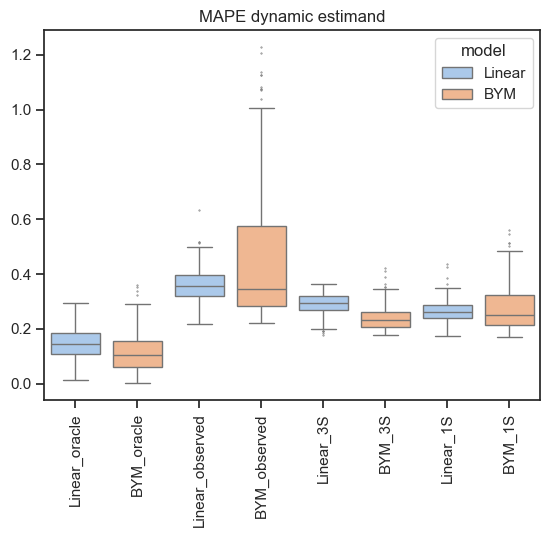

In [33]:
flierprops = dict(marker='.', markerfacecolor='None', markersize=1,  markeredgecolor='grey')
box_rmse = sns.boxplot(data=combined_df[combined_df["estimand"]=="dynamic"], x = 'method', y = 'MAE',
               # order = ['Oracle', 'Plugin','1','Cut-3S','Obs.'],
                       hue = "model", palette = 'pastel',
                       flierprops=flierprops)
box_rmse.set_title("MAPE dynamic estimand")
# plt.ylim(0,.5)
plt.xticks(rotation=90)
box_rmse.set_xlabel("")
box_rmse.set_ylabel("")
# sns.despine()

In [95]:
# Zeigen MAE plots

from matplotlib.ticker import PercentFormatter

plt.style.use('seaborn-v0_8-colorblind')
# sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.3)


zeigen_mae_obs = np.loadtxt('results/zeigen_mae_obs.txt')
esti_zeigen_mae_post = np.loadtxt('results/esti_zeigen_mae_post.txt')
zeigen_mae_post = np.loadtxt('results/zeigen_mae_post.txt')


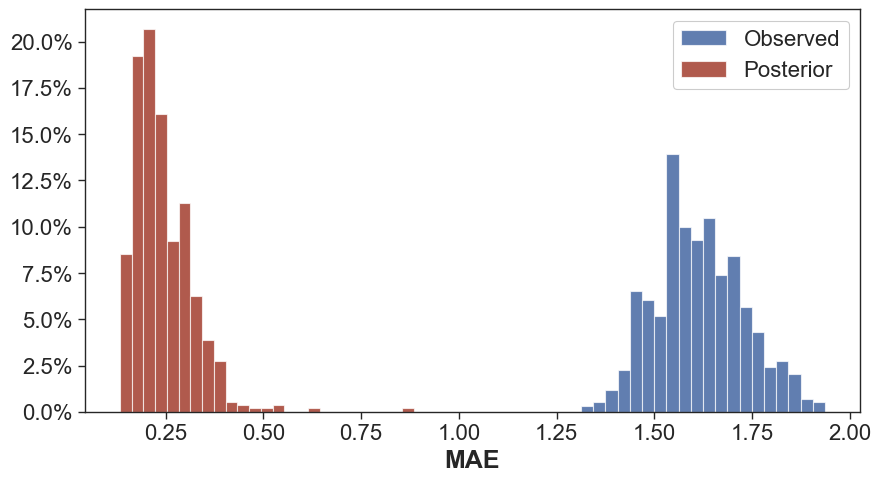

In [96]:

def plot_percentage_histogram(data, bins, ax, label, color, alpha=0.7):
    counts, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_widths = np.diff(bin_edges)
    percentage = counts * bin_widths * 100  # Convert to percentage
    ax.bar(bin_edges[:-1], percentage, width=bin_widths, alpha=alpha, label=label, color=color, align='edge')

fig, ax = plt.subplots(figsize=(9, 5))

# Plot histograms as density

plot_percentage_histogram(zeigen_mae_obs, 20, ax, 'Observed', 'xkcd:cobalt')
plot_percentage_histogram(esti_zeigen_mae_post, 25, ax, 'Posterior', 'xkcd:brick red')


# Set labels and title
ax.set_xlabel('MAE', fontsize=18, fontweight='bold')
ax.set_ylabel('')
ax.set_title('')

# Adjust y-axis to show correct percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f"{x:.1f}%"))

# Increase font size of tick labels
ax.tick_params(axis='both', which='major', labelsize=16)

# Add legend
ax.legend(fontsize=16,
          frameon=True, fancybox=True, framealpha=1)


# Save the figure
plt.tight_layout()
plt.savefig('results/figs/mae_hist.png', dpi=1000)
plt.show()
